# Module 2: Data in Cybersecurity

## 1. Sources of Cybersecurity Data
Typical sources of data used in cybersecurity include:

In [1]:
# Simulate raw cybersecurity log data
import pandas as pd
import numpy as np

np.random.seed(42)

data = {
    'timestamp': pd.date_range(start='2023-01-01 00:00:00', periods=10, freq='min').astype(str).tolist() + [None],
    'source_ip': ['192.168.1.1', '10.0.0.2', '172.16.0.3', '192.168.1.1', '10.0.0.2', 
                  '192.168.1.1', '10.0.0.2', '172.16.0.3', '192.168.1.1', 'INVALID_IP', '10.0.0.2'],
    'destination_ip': ['8.8.8.8', '8.8.4.4', '1.1.1.1', '8.8.8.8', '8.8.4.4', 
                       '1.0.0.1', '8.8.4.4', '1.1.1.1', '1.1.1.1', '8.8.8.8', ''],
    'bytes_sent': [500, 300, 1200, None, 450, 0, 999999, 700, 350, 400, 'NaN'],
    'protocol': ['TCP', 'UDP', 'tcp', 'TCP', 'udp', None, 'TCP', 'TCP', 'UDP', 'ICMP', ''],
    'attack_flag': [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]  # binary label for classification
}

logs_df = pd.DataFrame(data)
logs_df

,timestamp,source_ip,destination_ip,bytes_sent,protocol,attack_flag
0,2023-01-01 00:00:00,192.168.1.1,8.8.8.8,500,TCP,0
1,2023-01-01 00:01:00,10.0.0.2,8.8.4.4,300,UDP,0
2,2023-01-01 00:02:00,172.16.0.3,1.1.1.1,1200,tcp,1
3,2023-01-01 00:03:00,192.168.1.1,8.8.8.8,None,TCP,0
4,2023-01-01 00:04:00,10.0.0.2,8.8.4.4,450,udp,0
5,2023-01-01 00:05:00,192.168.1.1,1.0.0.1,0,None,0
6,2023-01-01 00:06:00,10.0.0.2,8.8.4.4,999999,TCP,1
7,2023-01-01 00:07:00,172.16.0.3,1.1.1.1,700,TCP,0
8,2023-01-01 00:08:00,192.168.1.1,1.1.1.1,350,UDP,1
9,2023-01-01 00:09:00,INVALID_IP,8.8.8.8,400,ICMP,1


## Step 1: Data Profiling

In [2]:
# Profile the dataset
print("Basic Info:")
print(logs_df.info())

print("\nDescriptive Statistics:")
print(logs_df.describe(include='all'))

print("\nMissing Values:")
print(logs_df.isnull().sum())

print("\nUnique values in each column:")
print(logs_df.nunique())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       10 non-null     object
 1   source_ip       11 non-null     object
 2   destination_ip  11 non-null     object
 3   bytes_sent      10 non-null     object
 4   protocol        10 non-null     object
 5   attack_flag     11 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 660.0+ bytes
None

Descriptive Statistics:
                  timestamp    source_ip destination_ip  bytes_sent protocol  \
count                    10           11             11        10.0       10   
unique                   10            4              5        10.0        6   
top     2023-01-01 00:00:00  192.168.1.1        8.8.8.8       500.0      TCP   
freq                      1            4              3         1.0        4   
mean                    NaN          NaN         

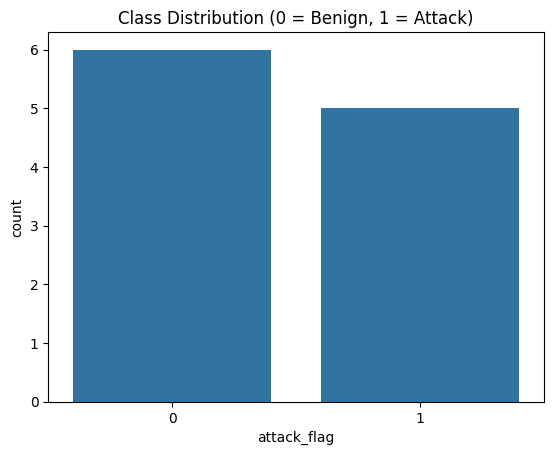

In [3]:
# Visualize Attack distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='attack_flag', data=logs_df)
plt.title('Class Distribution (0 = Benign, 1 = Attack)')
plt.show()

## Step 2: Data Cleaning

In [ ]:
# Clean data (fix types, missing values, invalid entries)
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'], errors='coerce')
logs_df['bytes_sent'] = pd.to_numeric(logs_df['bytes_sent'], errors='coerce')

# Replace empty strings and inconsistent protocol names
logs_df['protocol'] = logs_df['protocol'].str.upper().replace('', np.nan)
logs_df['destination_ip'] = logs_df['destination_ip'].replace('', np.nan)

# Drop rows with critical missing or invalid IP
logs_df = logs_df[logs_df['source_ip'].str.match(r'^\d{1,3}(\.\d{1,3}){3}$', na=False)]
logs_df = logs_df.dropna(subset=['timestamp', 'destination_ip', 'protocol', 'bytes_sent'])

logs_df.reset_index(drop=True, inplace=True)
logs_df


In [ ]:
# Plot the distribution of bytes_sent
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(logs_df['bytes_sent'], bins=10, kde=True)
plt.title('Distribution of Bytes Sent')
plt.xlabel('Bytes Sent')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Optional: Log-transformed version
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(logs_df['bytes_sent']), bins=10, kde=True)
plt.title('Log-Transformed Distribution of Bytes Sent')
plt.xlabel('log(Bytes Sent + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 3: Data Transformation

In [ ]:
# Transform data (feature engineering)
logs_df['hour'] = logs_df['timestamp'].dt.hour
logs_df['minute'] = logs_df['timestamp'].dt.minute
logs_df['bytes_log'] = np.log1p(logs_df['bytes_sent'])  # log-transform

# Encode protocol
logs_df = pd.get_dummies(logs_df, columns=['protocol'], prefix='proto')

logs_df

## Step 4: Data Reduction

In [ ]:
# Cell 4: Reduce features (example: PCA on numeric fields)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['bytes_sent', 'hour', 'minute', 'bytes_log']
X = logs_df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add back to dataframe
logs_df['pca_1'] = X_pca[:, 0]
logs_df['pca_2'] = X_pca[:, 1]

logs_df[['pca_1', 'pca_2']]

## Step 5: Data Enrichment

In [ ]:
# Enrich data with IP-based metadata (dummy example)
ip_region_map = {
    '192.168.1.1': 'Local',
    '10.0.0.2': 'CorpNet',
    '172.16.0.3': 'DMZ'
}
logs_df['source_region'] = logs_df['source_ip'].map(ip_region_map).fillna('Unknown')

logs_df

## Step 6: Data Validation

In [ ]:
# Cell 6: Validate final data
assert logs_df['bytes_sent'].min() >= 0, "❌ Negative bytes sent!"
assert logs_df['timestamp'].notnull().all(), "❌ Missing timestamps!"
assert logs_df['proto_TCP'].sum() + logs_df['proto_UDP'].sum()  == len(logs_df), "❌ Protocol encoding mismatch!"

print("✅ Data validation passed.")
